# import the necessary module

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# part1:get the data from yahoo finance on the daily closing price of tesla,gm and ford

In [7]:
import pandas_datareader
import datetime

In [8]:
import pandas_datareader.data as web

# TESLA Stock (Ticket:TSLA on the NASDAQ)

In [9]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2019,2,1)
tesla=web.DataReader('TSLA','yahoo',start,end)

In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [11]:
ford=web.DataReader('FORD','yahoo',start,end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75


In [12]:
gm=web.DataReader('GM','yahoo',start,end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


# part2: visualise the data, and inspect interesting events. In this section, we also create a candlestick chart from scratch.

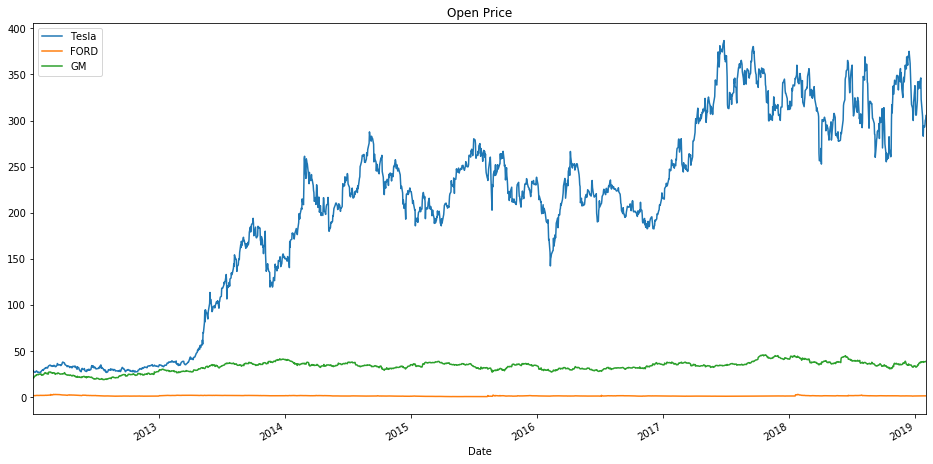

In [13]:
#plot based on opening prices
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
ford['Open'].plot(label='FORD')
gm['Open'].plot(label='GM')
plt.legend();

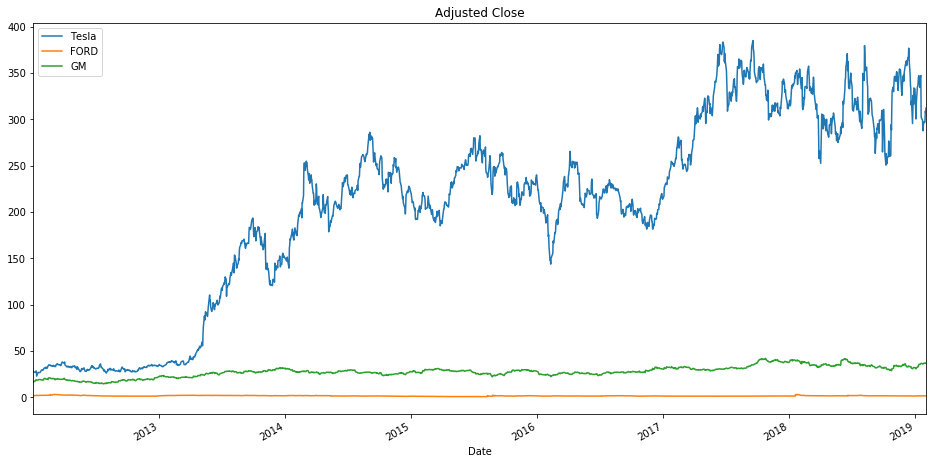

In [14]:
#plot based on Adjusted closing prices
tesla['Adj Close'].plot(label='Tesla',figsize=(16,8),title='Adjusted Close')
ford['Adj Close'].plot(label='FORD')
gm['Adj Close'].plot(label='GM')
plt.legend()

# plot the volume of stock traded each day

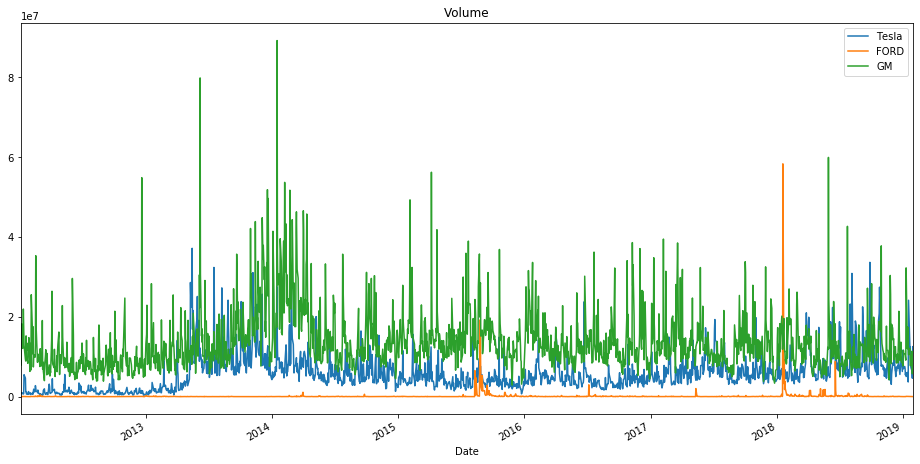

In [15]:
#daily volume
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume')
ford['Volume'].plot(label='FORD')
gm['Volume'].plot(label='GM')
plt.legend();

# what are the dates of maximum trading volumes for each?

In [17]:
ford['Volume'].idxmax()
gm['Volume'].idxmax()
tesla['Volume'].idxmax()

Timestamp('2013-05-14 00:00:00')

In [18]:
#dollars traded for the day
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

# plot this "Total Traded" against the time index

Text(0, 0.5, 'Total Traded')

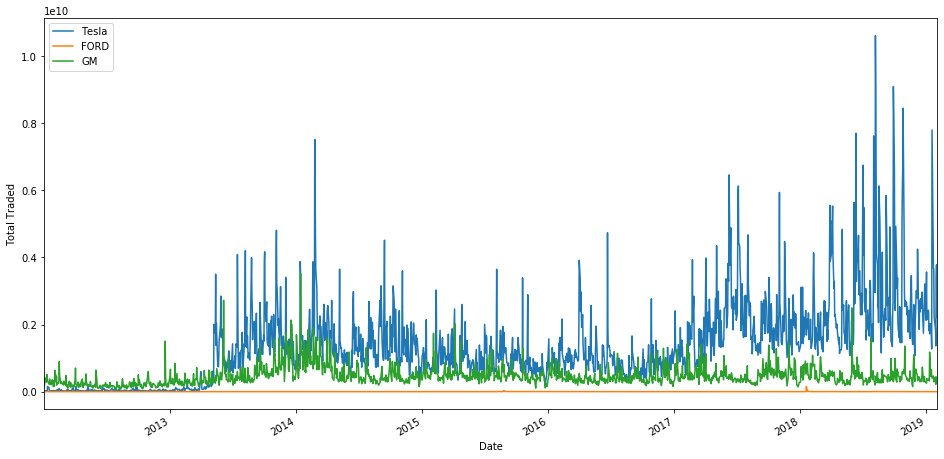

In [19]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label='FORD')
gm['Total Traded'].plot(label='GM')
plt.legend()
plt.ylabel('Total Traded')

In [20]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

# let's plot out some MA(Moving Averages).plot out the MA50 AND MA200 for GM

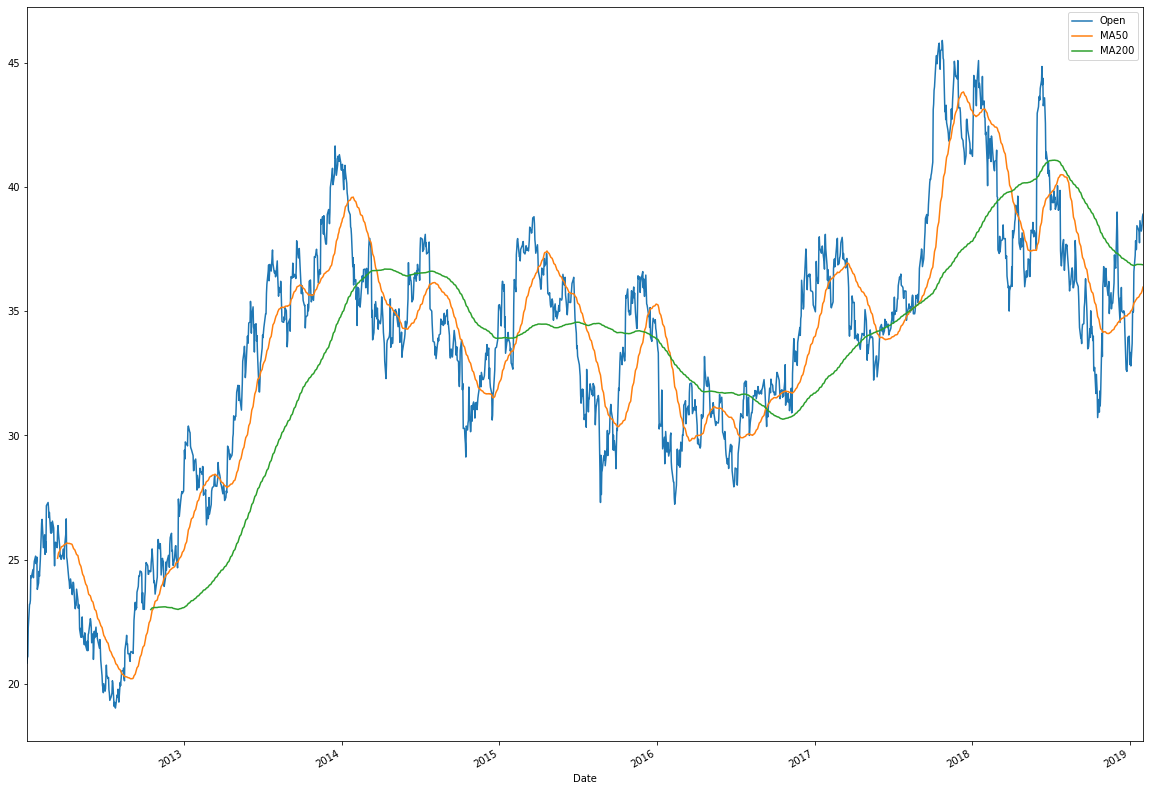

In [21]:
#plotting moving average of GM
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='GM',figsize=(20,15))

In [22]:
from pandas.plotting import scatter_matrix

In [24]:
car_comp=pd.concat([tesla['Close'],ford['Close'],gm['Close']],axis=1)
car_comp.columns=['Tesla Close','Ford Close','GM Close']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8CB354D08>,
      dtype=object)

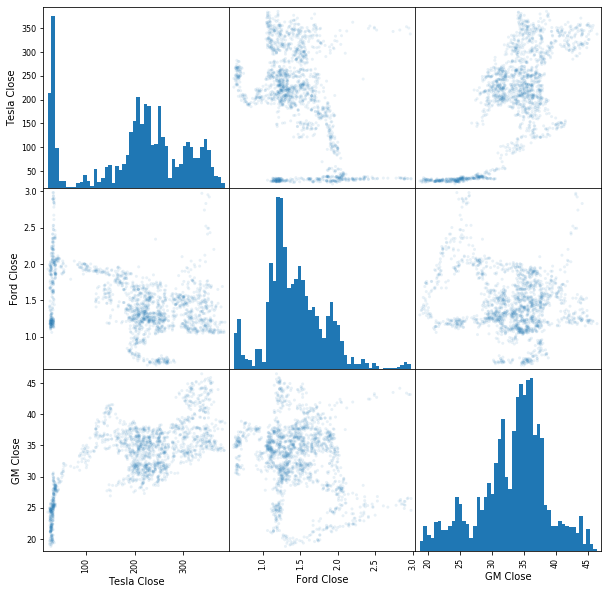

In [25]:
scatter_matrix(car_comp,figsize=(10,10),alpha=0.1,hist_kwds={'bins':50})

# Creating a candlestick chart for Ford

In [27]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DateLocator,MONDAY

In [31]:
#getting  a column of dates:
ford_reset=ford.loc['2018-12':'2019-02'].reset_index()
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date:date2num(date))

In [32]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2018-12-03,1.45,1.34,1.37,1.44,94000,1.44,128780.000448,737031.0
1,2018-12-04,1.44,1.38,1.44,1.38,136300,1.38,196272.007799,737032.0
2,2018-12-06,1.43,1.35,1.35,1.36,15700,1.36,21195.000374,737034.0
3,2018-12-07,1.43,1.36,1.42,1.42,23500,1.42,33369.998991,737035.0
4,2018-12-10,1.43,1.34,1.43,1.38,17100,1.38,24452.999103,737038.0


In [33]:
list_of_cols=['date_ax','Open','High','Low','Close']
ford_values=[tuple(vals) for vals in ford_reset[list_of_cols].values]

In [34]:
mondays=WeekdayLocator(MONDAY)
alldays=DateLocator()
weekFormatter=DateFormatter('%b %d')
dayFormatter=DateFormatter('%d')

([<matplotlib.lines.Line2D at 0x1f8c994b348>,
  <matplotlib.patches.Rectangle at 0x1f8cb4f94c8>])

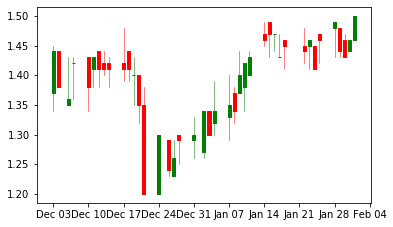

In [35]:
#plot the data
fig, ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

# part3: basic financial analysis, by calculating and comparing daily returns,and plotting it to identify relationships
   # daily percentage change
   # r(t)=(p(t)/(p(t)-1))

In [36]:
#calculate the return from the close price column
tesla['returns']=tesla['Close'].pct_change(1)
ford['returns']=ford['Close'].pct_change(1)
gm['returns']=gm['Close'].pct_change(1)

In [37]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [38]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67,28223.000956,NaN
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66,9407.999706,-0.005988
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67,15179.999781,0.006024
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67,16463.999486,0.000000
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75,59340.000987,0.047904


In [39]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490


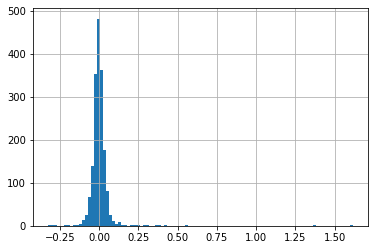

In [40]:
ford['returns'].hist(bins=100)

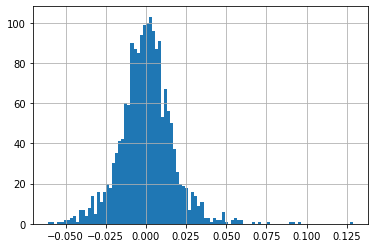

In [41]:
gm['returns'].hist(bins=100)

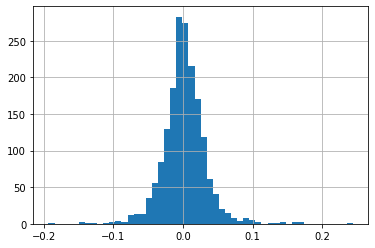

In [42]:
tesla['returns'].hist(bins=50)

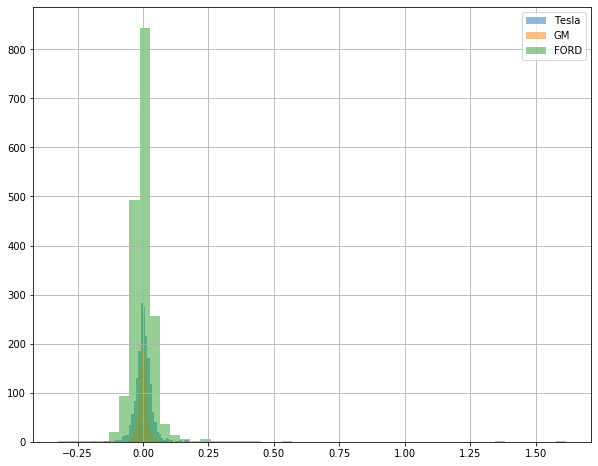

In [43]:
tesla['returns'].hist(bins=50,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=50,label='GM',alpha=0.5)
ford['returns'].hist(bins=50,label='FORD',alpha=0.5)
plt.legend()

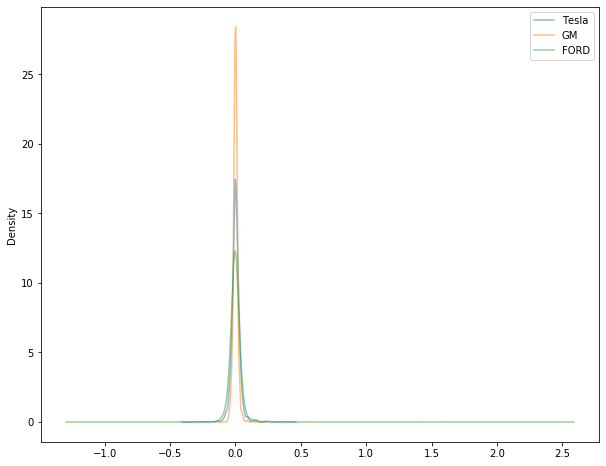

In [44]:
#KDE instead of histogram for another view point
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].plot(kind='kde',label='GM',alpha=0.5)
ford['returns'].plot(kind='kde',label='FORD',alpha=0.5)
plt.legend()

# some box plots comparing the returns

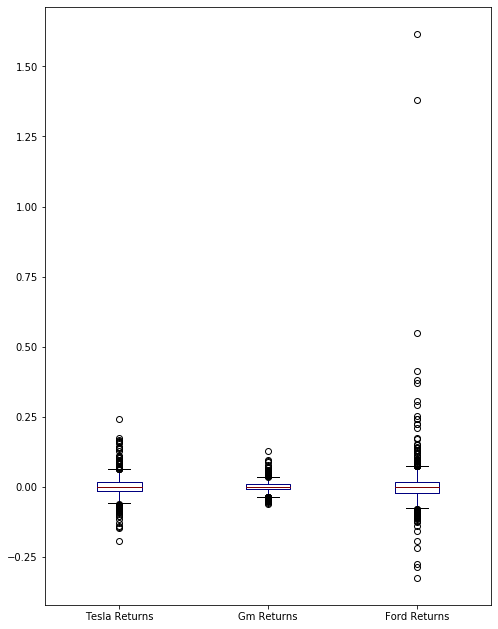

In [46]:
#box plots comparing the returns
box_df=pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns=['Tesla Returns','Gm Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

# Comparing daily returns between stocks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8CCFD9948>,
      dtype=object)

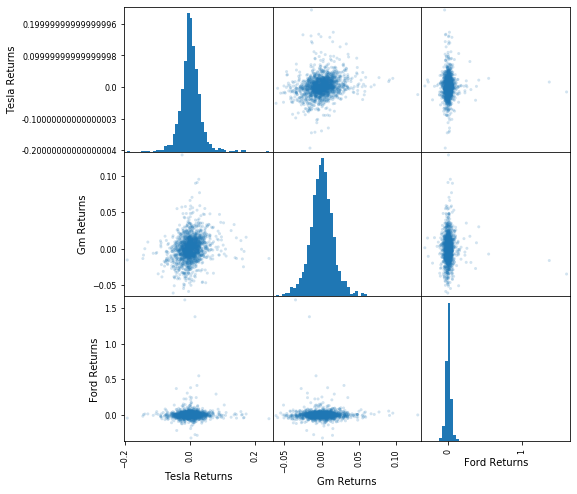

In [47]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

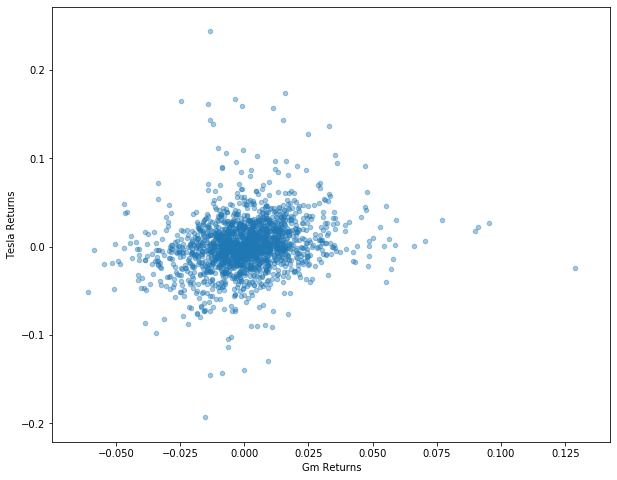

In [56]:
box_df.plot(kind='scatter', x= 'Gm Returns', y='Tesla Returns',alpha=0.4,figsize=(10,8));

# create a cumulative daily return column for each car company's dataframe

In [51]:
tesla['Cumulative Return']=(1 + tesla['returns']).cumprod()
ford['Cumulative Return']=(1 + ford['returns']).cumprod()
gm['Cumulative Return']=(1 + gm['returns']).cumprod()

In [52]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [53]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67,28223.000956,NaN,NaN
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66,9407.999706,-0.005988,0.994012
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67,15179.999781,0.006024,1.000000
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67,16463.999486,0.000000,1.000000
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75,59340.000987,0.047904,1.047904


In [54]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490,1.085036


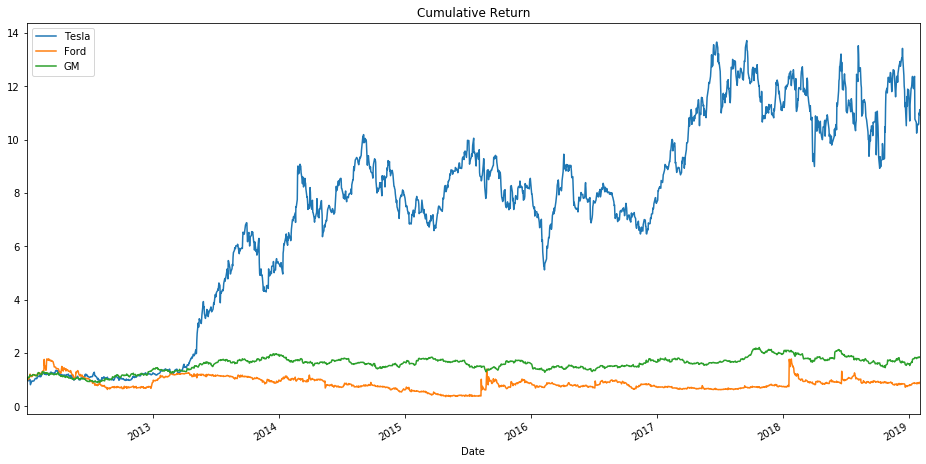

In [55]:
#Cumulative Return columns against the time series index. which stack the highest return for a $1 invested ?
#which showed the lowest ?
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()